In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing the datasets

In [2]:
german_credit_data=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/' \
                               '11. Courses/22. EECS 738 - Machine Learning/Assignments/german_credit_data.csv')

adult=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/' \
                               '11. Courses/22. EECS 738 - Machine Learning/Assignments/adult.csv')

# Taking a look in my data

We need to get some basic information about both datasets that we have:
    * german_credit_data
    * adult

## (1) german_credit_data

In [3]:
print("Shape: %s" % str(german_credit_data.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(german_credit_data.columns))
print("------------------------------------------------------------------")
str(german_credit_data.info())
print("------------------------------------------------------------------")
print(german_credit_data.describe())
print("------------------------------------------------------------------")
german_credit_data.head()

Shape: (1000, 10)
------------------------------------------------------------------
Column names: Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 58.6+ KB
------------------------------------------------------------------
        Unnamed: 0          Age          Job 

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## (2) adult

In [4]:
print("Shape: %s" % str(adult.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(adult.columns))
print("------------------------------------------------------------------")
str(adult.info())
print("------------------------------------------------------------------")
print(adult.describe())
print("------------------------------------------------------------------")
adult.head()

Shape: (32561, 15)
------------------------------------------------------------------
Column names: Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Handling Missing Data

In [5]:
german_credit_data = german_credit_data.dropna()

#Taking a look in my data

print("Shape: %s" % str(german_credit_data.shape))
print("------------------------------------------------------------------")
str(german_credit_data.info())
print("------------------------------------------------------------------")
print(german_credit_data.describe())
print("------------------------------------------------------------------")
german_credit_data.head()

Shape: (522, 10)
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
Unnamed: 0          522 non-null int64
Age                 522 non-null int64
Sex                 522 non-null object
Job                 522 non-null int64
Housing             522 non-null object
Saving accounts     522 non-null object
Checking account    522 non-null object
Credit amount       522 non-null int64
Duration            522 non-null int64
Purpose             522 non-null object
dtypes: int64(5), object(5)
memory usage: 34.7+ KB
------------------------------------------------------------------
       Unnamed: 0         Age         Job  Credit amount    Duration
count  522.000000  522.000000  522.000000     522.000000  522.000000
mean   493.522989   34.888889    1.875479    3278.745211   21.339080
std    291.131014   11.787918    0.682811    2929.155177   12.474079
min      1.000000   19

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
7,7,35,male,3,rent,little,moderate,6948,36,car
9,9,28,male,3,own,little,moderate,5234,30,car


In [6]:
adult = adult.dropna()

#Taking a look in my data

print("Shape: %s" % str(adult.shape))
print("------------------------------------------------------------------")
str(adult.info())
print("------------------------------------------------------------------")
print(adult.describe())
print("------------------------------------------------------------------")
adult.head()

Shape: (32561, 15)
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB
------------------------------------------------------------------
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.0

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


So, after handling the missing data, we end up with 522 observations on 'german_credit_data' dataset.
The 'adult' dataset didn't have any missing data.

## Analyzing datasets with histograms

In this section we just want to explore our dataset before we estimate the distributions of the features programatically.

In order to do that we use histograms and pairplots to visualize our data, from both datasets.

### german_credit_data

[Text(0,0.5,'Number of Ocurrence'), Text(0.5,1,'Purpose')]

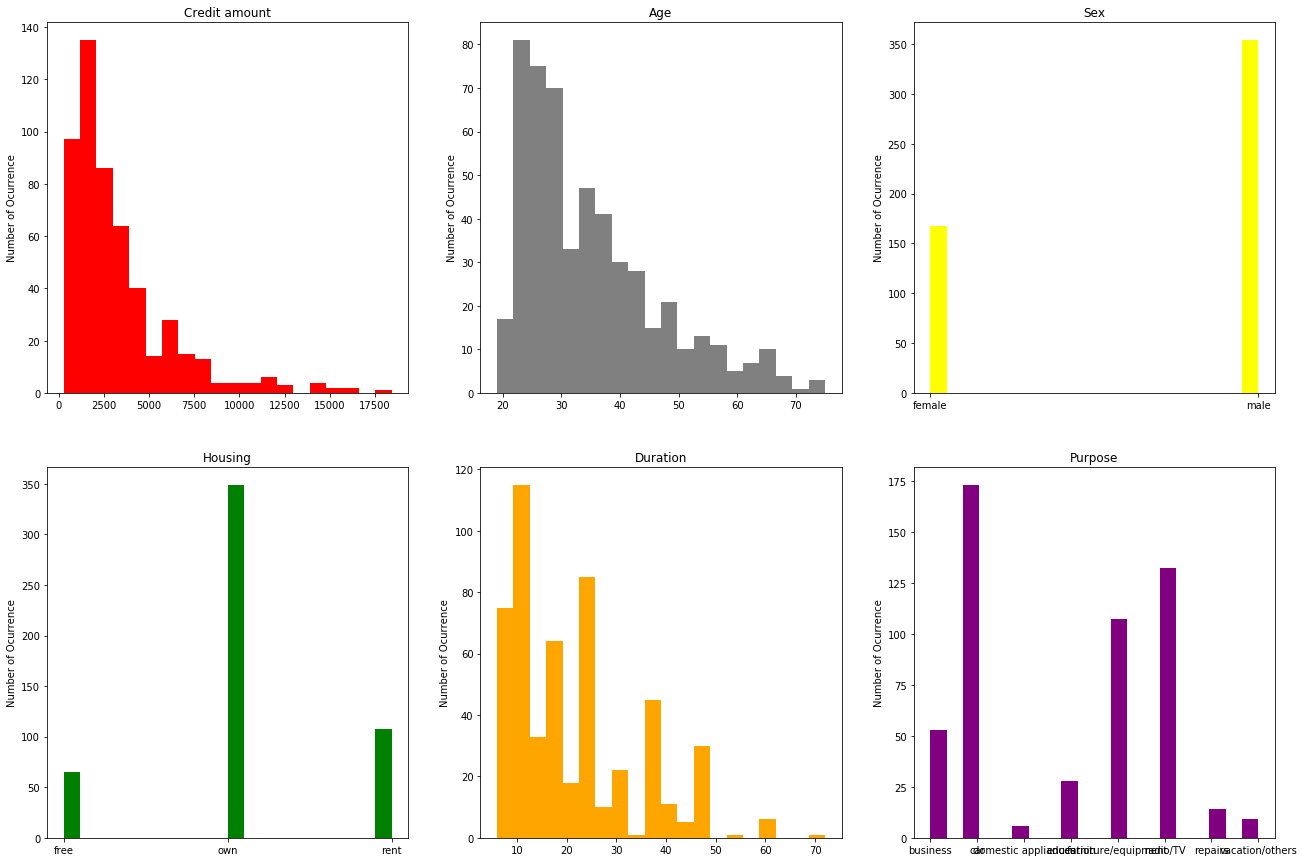

In [7]:
credit_amount_hist = np.histogram(german_credit_data['Credit amount'])
n_bins = 20

#fig = plt.figure( figsize=(20,15))
fig, axs = plt.subplots(2, 3, sharey=False, tight_layout=False, figsize=(22,15))

axs[0,0].hist(german_credit_data['Credit amount'], bins=n_bins, color='red')
axs[0,1].hist(german_credit_data['Age'], bins=n_bins, color='grey')
axs[0,2].hist(german_credit_data['Sex'], bins=n_bins, color='yellow')
axs[1,0].hist(german_credit_data['Housing'], bins=n_bins, color='green')
axs[1,1].hist(german_credit_data['Duration'], bins=n_bins, color='orange')
axs[1,2].hist(german_credit_data['Purpose'], bins=n_bins, color='purple')

axs[0,0].set(title='Credit amount', ylabel='Number of Ocurrence')
axs[0,1].set(title='Age', ylabel='Number of Ocurrence')
axs[0,2].set(title='Sex', ylabel='Number of Ocurrence')
axs[1,0].set(title='Housing', ylabel='Number of Ocurrence')
axs[1,1].set(title='Duration', ylabel='Number of Ocurrence')
axs[1,2].set(title='Purpose', ylabel='Number of Ocurrence')

### adult

[Text(0,0.5,'Number of Ocurrence'), Text(0.5,1,'hours.per.week')]

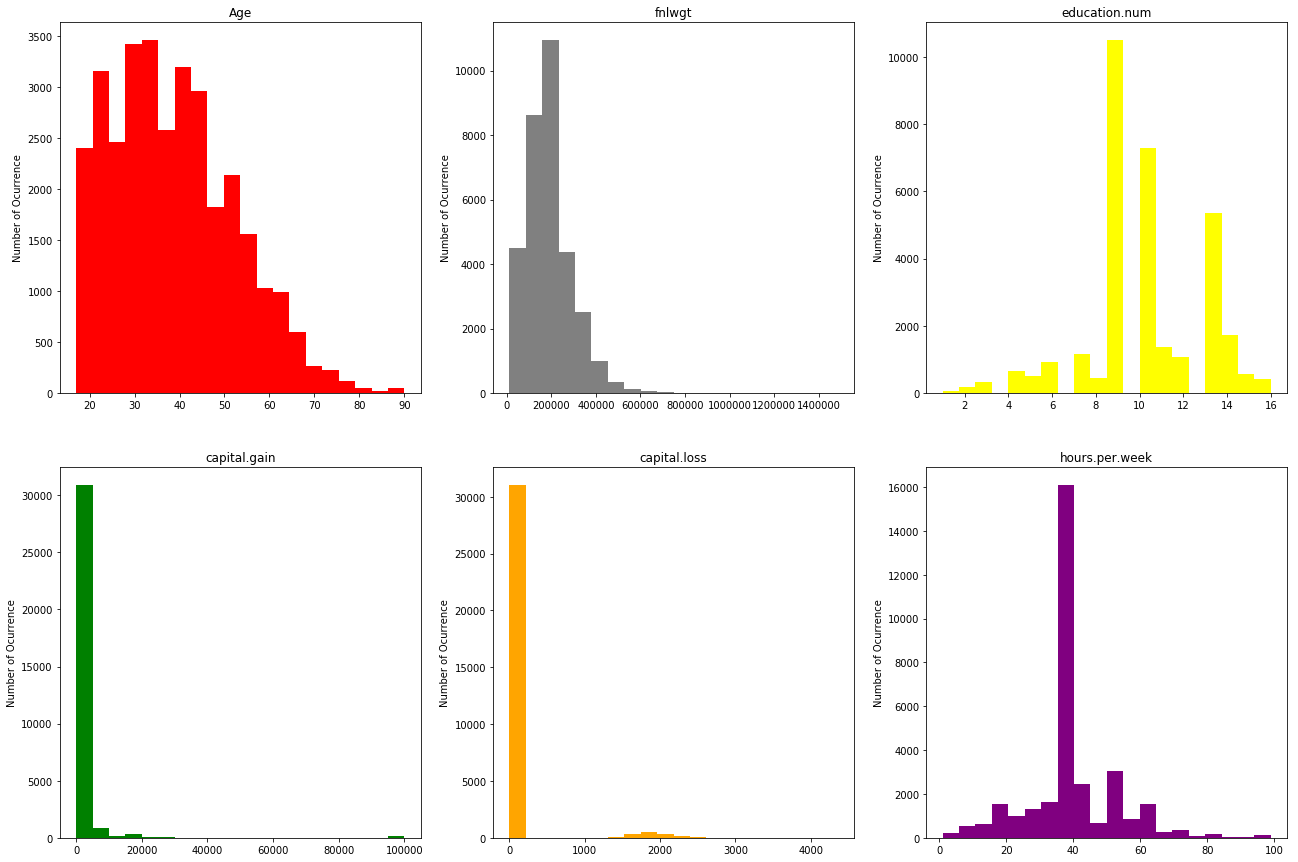

In [8]:
#fig = plt.figure( figsize=(20,15))
fig, axs = plt.subplots(2, 3, sharey=False, tight_layout=False, figsize=(22,15))

axs[0,0].hist(adult['age'], bins=n_bins, color='red')
axs[0,1].hist(adult['fnlwgt'], bins=n_bins, color='grey')
axs[0,2].hist(adult['education.num'], bins=n_bins, color='yellow')
axs[1,0].hist(adult['capital.gain'], bins=n_bins, color='green')
axs[1,1].hist(adult['capital.loss'], bins=n_bins, color='orange')
axs[1,2].hist(adult['hours.per.week'], bins=n_bins, color='purple')

axs[0,0].set(title='Age', ylabel='Number of Ocurrence')
axs[0,1].set(title='fnlwgt', ylabel='Number of Ocurrence')
axs[0,2].set(title='education.num', ylabel='Number of Ocurrence')
axs[1,0].set(title='capital.gain', ylabel='Number of Ocurrence')
axs[1,1].set(title='capital.loss', ylabel='Number of Ocurrence')
axs[1,2].set(title='hours.per.week', ylabel='Number of Ocurrence')

### Pairplots

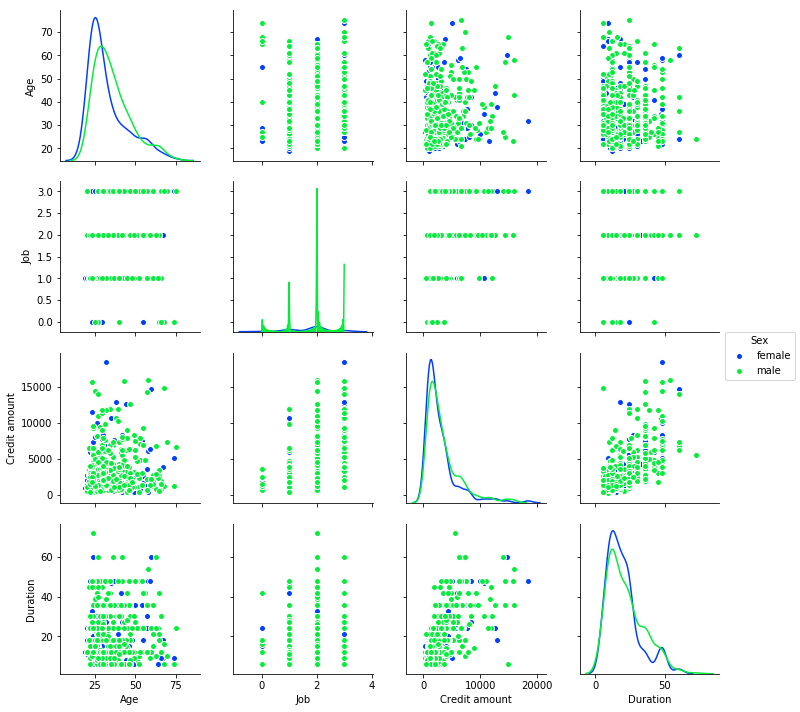

In [10]:
sns.pairplot(german_credit_data, vars=['Age', 'Job', 'Credit amount', 'Duration'], diag_kind='kde', palette="bright",
            hue="Sex")

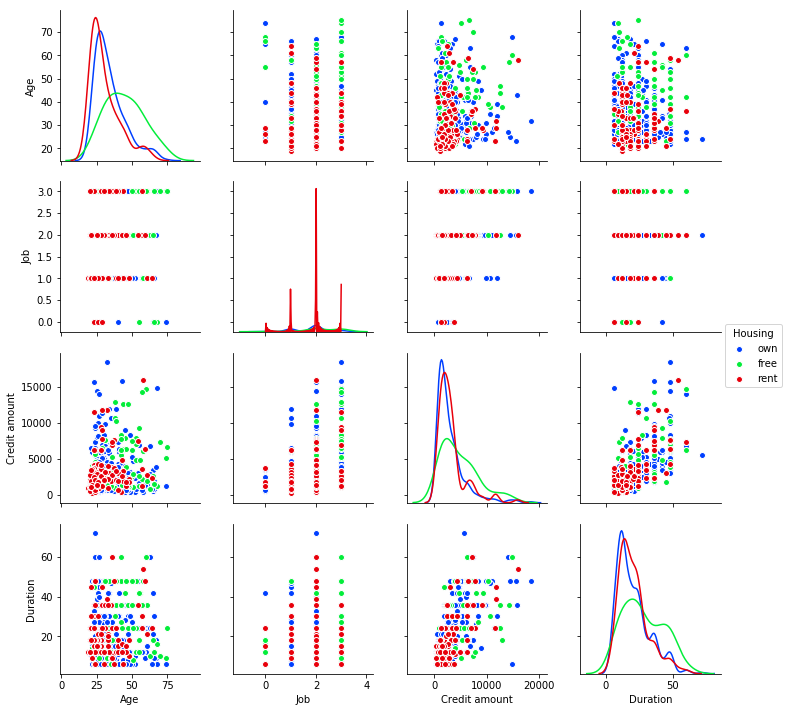

In [11]:
sns.pairplot(german_credit_data, vars=['Age', 'Job', 'Credit amount', 'Duration'], 
             diag_kind='kde', palette="bright", hue="Housing")

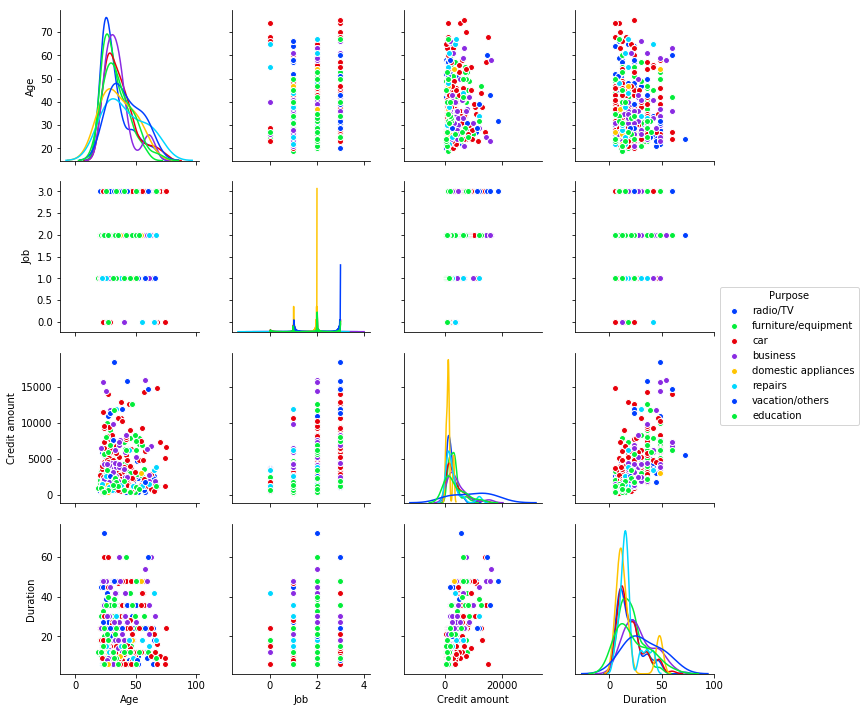

In [12]:
sns.pairplot(german_credit_data, vars=['Age', 'Job', 'Credit amount', 'Duration'], 
             diag_kind='kde', palette="bright", hue="Purpose")

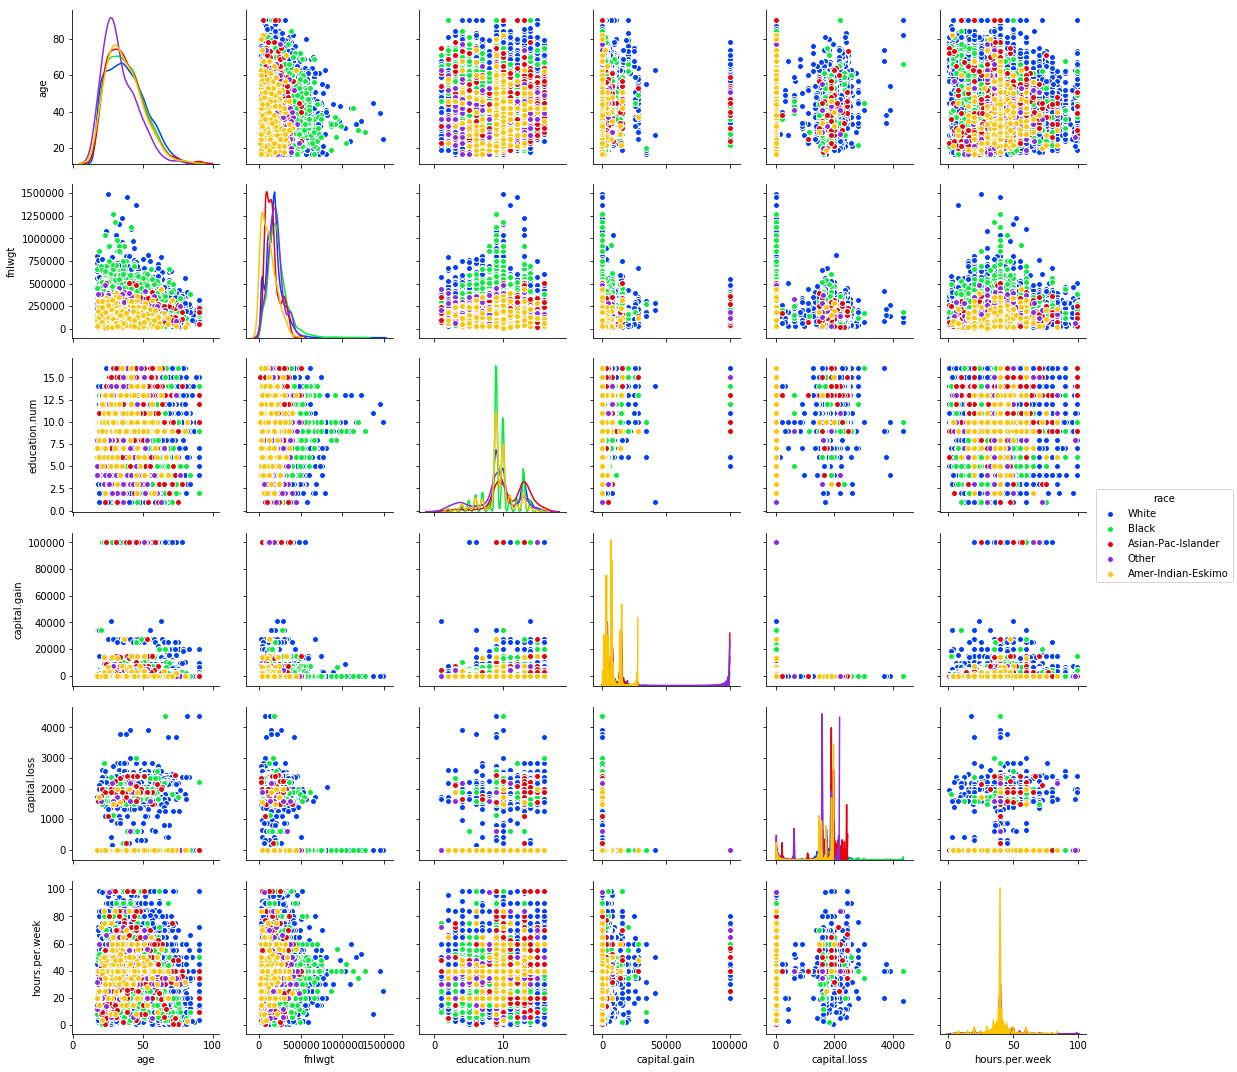

In [13]:
sns.pairplot(adult, vars=['age', 'fnlwgt', 'education.num', 'capital.gain','capital.loss', 'hours.per.week'], 
             diag_kind='kde', palette="bright", hue="race")

# Finding the distributions Programatically

## 'german_credit_data' Dataset

### variable: 'Credit amount'

We want to analyze the 'german_credit_data' dataset. We want to see how Gaussian Mixture Models can assist us to estimate the distrubtions of each feature. Therefore we want to make a 1 dimension analysis (we are not interested to find joint distributions).

Let's start with the feature: 'Credit amount'

Just to have an idea, let's look again the histogram of this variable again.

(array([ 97., 135.,  86.,  64.,  40.,  14.,  28.,  15.,  13.,   4.,   4.,
          4.,   6.,   3.,   0.,   4.,   2.,   2.,   0.,   1.]),
 array([  276. ,  1183.4,  2090.8,  2998.2,  3905.6,  4813. ,  5720.4,
         6627.8,  7535.2,  8442.6,  9350. , 10257.4, 11164.8, 12072.2,
        12979.6, 13887. , 14794.4, 15701.8, 16609.2, 17516.6, 18424. ]),
 <a list of 20 Patch objects>)

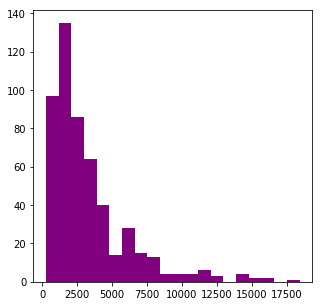

In [109]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.hist(german_credit_data['Credit amount'], bins=20, color='purple')

Inspecting visually the histogram above, it might suggest that we may use three Normal distribution to model 'age' variable distribution.
The could be the following:

* N(1500, 500)
* N(6500, 500)
* N(11000, 500)

This means that our first guess is that there is a Gaussian distribution with mean around 1500, another Gaussian distribution with mean at 6500 and finally another one with mean at 11000. For all of them we guess a variance of 500.

Now, let's see the 1xd plot of the 'Credit amount'

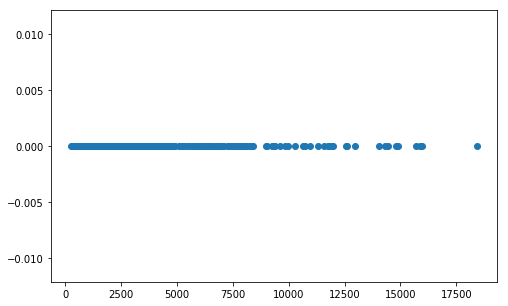

In [111]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(german_credit_data['Credit amount'], np.full(len(german_credit_data['Credit amount']),0) )

Eye inspecting the plot above, we can see that there are around 3 cluster that we intend to represent each one of our 3 Normal distributions. 

Now let's try to find a mixed model with Gaussian distributions.

We call as 'X_tot' our variable.

Then we create a nx3 matrix and call it r.

In [129]:
X_tot = german_credit_data['Credit amount']

r = np.zeros((len(X_tot),3))  

gauss_1 = scipy.stats.norm(loc=1500,scale=500) 
gauss_2 = scipy.stats.norm(loc=6500,scale=500)
gauss_3 = scipy.stats.norm(loc=11000,scale=500)

pi = np.array([1/3,1/3,1/3]) # We expect to have three clusters 

for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot)
                          
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])

Let's check our r matrix

In [130]:
print(r.shape)
print("------------------------------------------------------------------")
print(r)

(522, 3)
------------------------------------------------------------------
[[1.13195540e-17 1.00000000e+00 1.31636223e-22]
 [1.91150903e-34 9.99999836e-01 1.63901506e-07]
 [2.77508317e-08 9.99999972e-01 4.66523335e-31]
 ...
 [9.45833300e-01 5.41667005e-02 3.04565133e-40]
 [1.00000000e+00 1.91384971e-19 2.01116024e-73]
 [9.92940571e-06 9.99990071e-01 2.34737607e-33]]


Now let's plot all three Gaussian distributions with our data on x-axis and y=0 for all of them

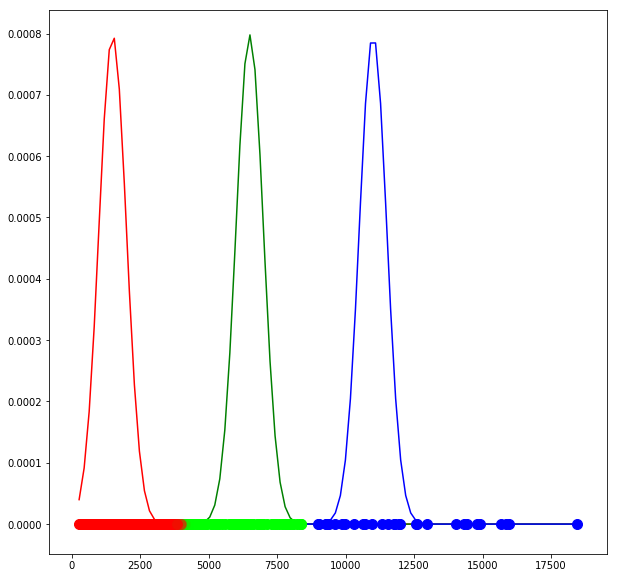

In [131]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
   
for g,c in zip([gauss_1.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100 )),
                gauss_2.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_3.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100))],['r','g','b']):
    ax.plot(np.linspace(X_tot.min(),X_tot.max(), num=100),g,c=c,zorder=0)
    
for i in range(len(r)):
    ax.scatter(X_tot.iloc[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100 )
    
plt.show()

Clearly, we can improve setting better variance parameters for all 3 prior Gaussian distributions.
Let's try to set:

    * N(1500, 400)
    * N(6500, 500)
    * N(11000, 900)


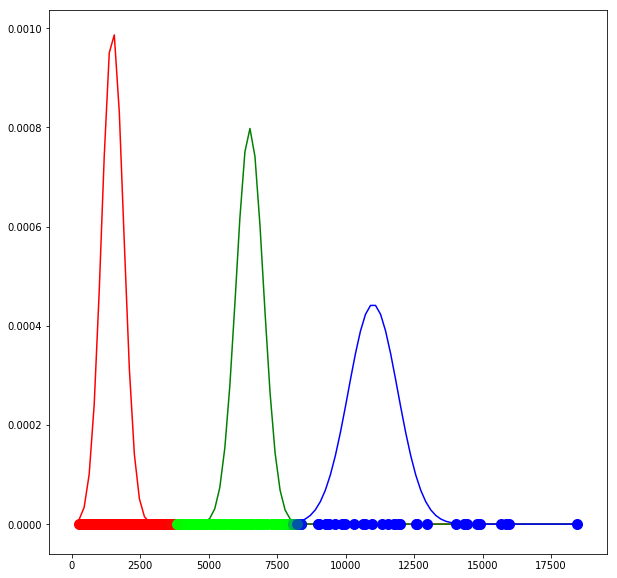

In [133]:
X_tot = german_credit_data['Credit amount']

r = np.zeros((len(X_tot),3))  

gauss_1 = scipy.stats.norm(loc=1500,scale=400) 
gauss_2 = scipy.stats.norm(loc=6500,scale=500)
gauss_3 = scipy.stats.norm(loc=11000,scale=900)

pi = np.array([1/3,1/3,1/3]) # We expect to have three clusters 

for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot)
                          
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
   
for g,c in zip([gauss_1.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100 )),
                gauss_2.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_3.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100))],['r','g','b']):
    ax.plot(np.linspace(X_tot.min(),X_tot.max(), num=100),g,c=c,zorder=0)
    
for i in range(len(r)):
    ax.scatter(X_tot.iloc[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100 )
    
plt.show()    

Now we have a better mixed models of Gaussians.

### variable 'Age'

Now we try find a Gaussian Misture Model to model the variable 'Age' from 'german_credit_data' dataset.
Let's look the histogram again:

(array([17., 81., 75., 70., 33., 47., 41., 30., 28., 15., 21., 10., 13.,
        11.,  5.,  7., 10.,  4.,  1.,  3.]),
 array([19. , 21.8, 24.6, 27.4, 30.2, 33. , 35.8, 38.6, 41.4, 44.2, 47. ,
        49.8, 52.6, 55.4, 58.2, 61. , 63.8, 66.6, 69.4, 72.2, 75. ]),
 <a list of 20 Patch objects>)

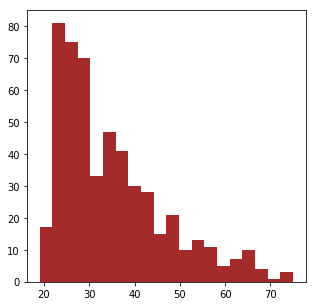

In [134]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.hist(german_credit_data['Age'], bins=20, color='brown')

Inspecting visually the histogram above, it might suggest that we may use three Normal distribution to model 'age' variable distribution.
The could be the following:

* N(25, 2)
* N(35, 3)
* N(48, 1)
* N(54, 1)
* N(65, 1)

This means that our first guess is that there is a Gaussian distribution with mean around 25, another Gaussian distribution with mean at 35, another at 48m another at 54 and finally another one with mean at 65. The guessed variances are: 2, 3, 1, 1, 1 respectively.

Now let's try our approach again:

In [142]:
X_tot = german_credit_data['Age']

r = np.zeros((len(X_tot),5))  

gauss_1 = scipy.stats.norm(loc=25,scale=2) 
gauss_2 = scipy.stats.norm(loc=35,scale=3)
gauss_3 = scipy.stats.norm(loc=48,scale=1)
gauss_4 = scipy.stats.norm(loc=54,scale=1)
gauss_5 = scipy.stats.norm(loc=65,scale=1)

pi = np.array([1/5,1/5,1/5, 1/5, 1/5]) 

for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3, gauss_4, gauss_5],pi):
    r[:,c] = p*g.pdf(X_tot)
                          
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])  

Let's check our r matrix

In [143]:
print(r.shape)
print("------------------------------------------------------------------")
print(r)

(522, 5)
------------------------------------------------------------------
[[9.99828259e-001 1.71740532e-004 9.95409571e-147 0.00000000e+000
  0.00000000e+000]
 [7.77869973e-021 1.03942396e-001 8.96057604e-001 0.00000000e+000
  0.00000000e+000]
 [3.68299037e-038 1.36040393e-003 9.98639596e-001 0.00000000e+000
  0.00000000e+000]
 ...
 [3.67067333e-012 1.00000000e+000 1.52364789e-013 0.00000000e+000
  0.00000000e+000]
 [9.99631413e-001 3.68587007e-004 6.32399528e-136 0.00000000e+000
  0.00000000e+000]
 [9.69558106e-001 3.04418937e-002 5.53118034e-096 0.00000000e+000
  0.00000000e+000]]


Now let's plot all 5 Gaussian distributions with our data on x-axis and y=0 for all of them

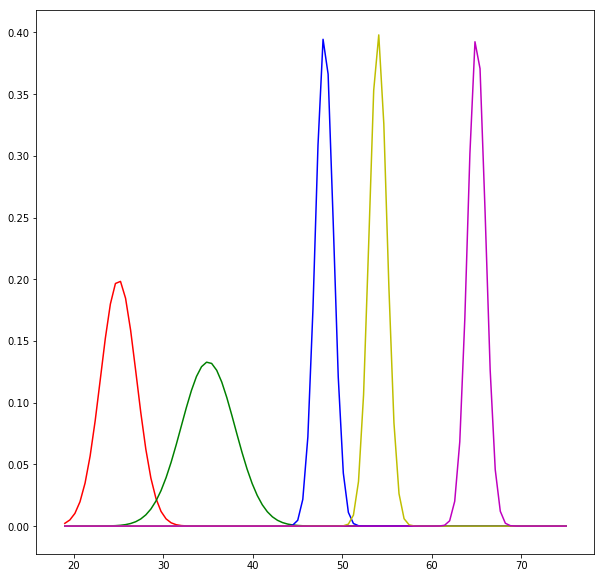

In [155]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
   
for g,c in zip([gauss_1.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100 )),
                gauss_2.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_3.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_4.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_5.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100))],['r','g','b','y','m']):
    ax.plot(np.linspace(X_tot.min(),X_tot.max(), num=100),g,c=c,zorder=0)
    
plt.show()  

## 'adult' Dataset

Now, we want to analyze the 'adult' dataset.
We want to see how **Gaussian Mixture Models** can assist us to estimate the distrubtions of each feature. Therefore we want to make a 1 dimension analysis (we are not interested to find joint distributions). 

Let's start with the feature: 'age'

Just to have an idea, let's look again the histogram of this variable again. 

(array([2410., 3160., 2461., 3429., 3465., 2583., 3198., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <a list of 20 Patch objects>)

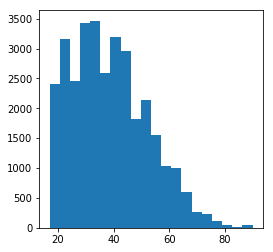

In [107]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.hist(adult['age'], bins=20 )

Inspecting visually the histogram above, it might suggest that we may use three Normal distribution to model 'age' variable distribution.

The could be the following:
    * N(30, 2)
    * N(42, 2)
    * N(50, 2)
    
This means that our first guess is that there is a Gaussian distribution with mean around 30 years, another Gaussian distribution with mean at 42 and finally another one with mean at 50 years. For all of them we guess a variance of 2 years.

Now, let's see the 1xd plot of the 'age'

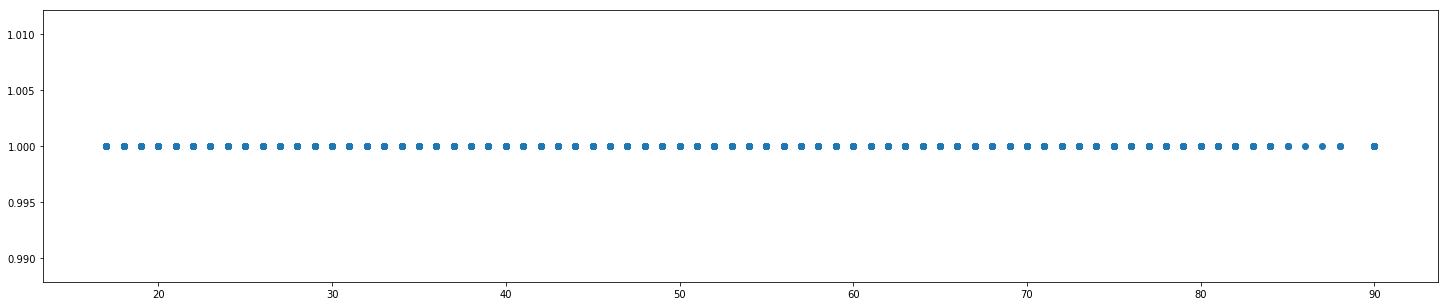

In [20]:
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)
ax.scatter(adult['age'], np.full(len(adult['age']),0) )

Now let's try our approach again:

In [156]:
X_tot = adult['age']
r = np.zeros((len(X_tot),3))  

gauss_1 = scipy.stats.norm(loc=30,scale=2) 
gauss_2 = scipy.stats.norm(loc=42,scale=2)
gauss_3 = scipy.stats.norm(loc=50,scale=2)

pi = np.array([1/3,1/3,1/3]) 

for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot)

for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])
    
print(r)
print(np.sum(r,axis=1)) 

[[2.66919022e-109 6.05460190e-039 1.00000000e+000]
 [6.28288051e-092 5.38018616e-032 1.00000000e+000]
 [3.48110684e-057 4.24835426e-018 1.00000000e+000]
 ...
 [6.14413685e-006 9.99987712e-001 6.14413685e-006]
 [8.19401262e-040 3.77513454e-011 1.00000000e+000]
 [1.00000000e+000 5.74952226e-019 8.19401262e-040]]
[1. 1. 1. ... 1. 1. 1.]


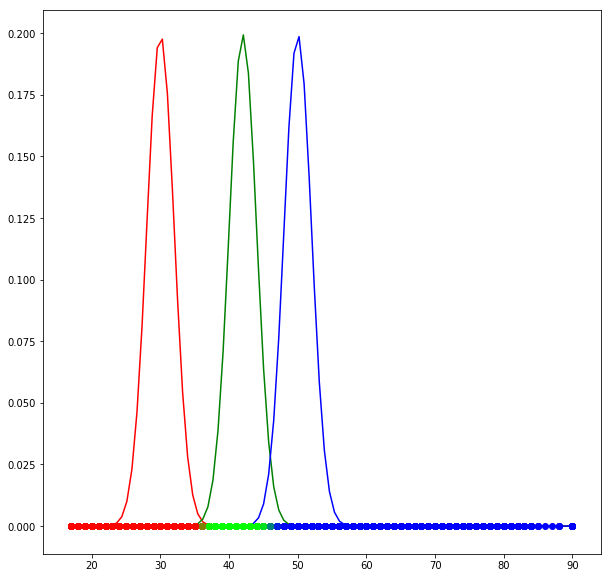

In [71]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
                                                                       
for g,c in zip([gauss_1.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_2.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_3.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100))],['r','g','b']):
    ax0.plot(np.linspace(X_tot.min(),X_tot.max(), num=100),g,c=c,zorder=0)

for i in range(len(r)):
    ax0.scatter(X_tot.iloc[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]) )
    
plt.show()

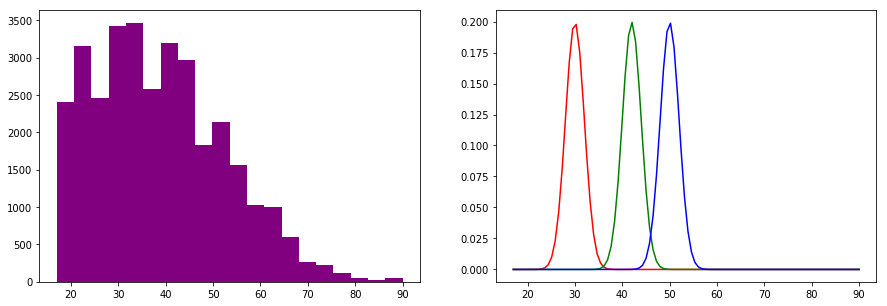

In [106]:
fig, axs = plt.subplots(1,2, sharex=True, tight_layout=False, figsize=(15,5))

axs[0].hist(adult['age'], bins=20, color='purple')
for g,c in zip([gauss_1.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_2.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100)),
                gauss_3.pdf(np.linspace(X_tot.min(),X_tot.max(), num=100))],['r','g','b']):
    axs[1].plot(np.linspace(X_tot.min(),X_tot.max(), num=100),g,c=c,zorder=0)
